In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModelForImageClassification, AutoImageProcessor

from transformers import pipeline
from datasets import load_dataset
from tqdm import tqdm
import csv

dataset = load_dataset("sartajbhuvaji/Brain-Tumor-Classification")

In [ ]:
from descriptionv5 import descript
from miniclip2 import generate_report, get_clip_score, get_blip_score

# 1. Predict class

In [3]:
image_processor = AutoImageProcessor.from_pretrained("./swin_tiny_tuned")
model = AutoModelForImageClassification.from_pretrained("./swin_tiny_tuned")

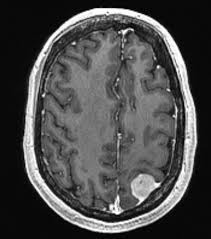

In [4]:
test_idx = 200
image = dataset['Testing'][test_idx]['image']
image

In [5]:
# prepare image for the model
encoding = image_processor(image.convert("RGB"), return_tensors="pt")

# forward pass
with torch.no_grad():
    outputs = model(**encoding)
    logits = outputs.logits

predicted_class_idx = logits.argmax().item()
print("Predicted class:", label_pred:=model.config.id2label[predicted_class_idx])
print("True class label:", dataset['Testing'][test_idx]['label'])
dic_class = {0:"glioma", 1:"meningioma", 2:"no", 3:"pituitary"}
print("True class name:", dic_class[dataset['Testing'][test_idx]['label']])

Predicted class: meningioma_tumor
True class label: 1
True class name: meningioma


# 2. Generate report

### Description

In [7]:
caption = descript(image, predicted_class_idx)
caption 

'This is a T1 weighted image of a brain with a meningioma tumor. It is located in the left frontal lobe.'

### Report

In [14]:
report = generate_report(image, caption)

In [15]:
import pprint
pp = pprint.PrettyPrinter(width=100, compact=True)
pp.pprint(report)

('The MRI image presented is a T1-weighted brain scan, providing high contrast between the brain '
 'tissue and the meningioma tumor. The tumor is located in the left frontal lobe, which can be '
 'identified by its characteristic anatomical structures such as the lateral ventricle, third '
 'ventricle, and surrounding gyri and sulci. The meningioma appears as a well-circumscribed, '
 'homogenous mass with hyperintense signal on T1-weighted imaging, indicating its potential '
 'malignancy. Further clinical correlation and diagnostic workup are required to determine the '
 "exact nature of the lesion and its impact on the patient's health.")
